### Codio Activity 13.4: Decision Boundaries with Two Variables

**Expected Time = 60 minutes** 

**Total Points = 40** 

In the first examples, your work has utilized a straight vertical line as the decision boundary for logistic regression. This is what a decision boundary looks like with only one feature, however with two features the decision boundary becomes a linear function of the two inputs. In this activity, you will focus on generating functions for these boundaries and show strategies for visualizing these boundaries. 

#### Index

  - [Problem 1](#-Problem-1)
  - [Problem 2](#-Problem-2)
  - [Problem 3](#-Problem-3)
  - [Problem 4](#-Problem-4)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

### The Data

Again, you will use the penguins data from seaborn.  This time, you will use two features -- `flipper_length_mm` and `bill_length_mm` to build a logistic model and visualize the decision boundary.  The data is loaded and visualized below.  

In [2]:
penguins = sns.load_dataset('penguins').dropna()
penguins = penguins.loc[(penguins['species'] == 'Adelie') | (penguins['species'] == 'Gentoo')]
X = penguins.drop('species', axis = 1)[['flipper_length_mm', 'bill_length_mm']]
y = np.where(penguins.species == 'Adelie', 0, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [3]:
X.head()

,flipper_length_mm,bill_length_mm
0,181.0,39.1
1,186.0,39.5
2,195.0,40.3
4,193.0,36.7
5,190.0,39.3


<AxesSubplot:xlabel='flipper_length_mm', ylabel='bill_length_mm'>

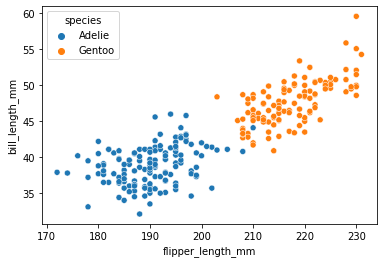

In [4]:
sns.scatterplot(data = penguins, x = 'flipper_length_mm', y = 'bill_length_mm', hue = 'species')

[Back to top](#-Index)

### Problem 1

#### A Logistic Model

**10 Points**

To get started, instantiate a `LogisticRegression` object as `log_reg` below and fit on the training data.

In [5]:
### GRADED

log_reg = ''

# YOUR CODE HERE
#raise NotImplementedError()
log_reg = LogisticRegression().fit(X_train, y_train)

# Answer check
print(log_reg)

LogisticRegression()


[Back to top](#-Index)

### Problem 2

#### Examining the coefficients

**10 Points**

Now, our sigma function looks like:

$$\sigma(x) = \frac{1}{1 + e^{-z}}$$

where

$$z = \beta_0 + \beta_1 * x_0 + \beta_2 * x_1.$$

Below, assign the coefficients and intercept to `beta_0`, `beta_1` and `beta_2` respectively as floats.  Note that $x_0$ is flipper length.  

In [6]:
log_reg.coef_[0], log_reg.intercept_[0]

(array([0.61278933, 0.69025164]), -156.05999253205056)

In [7]:
### GRADED

beta_0 = ''
beta_1 = ''
beta_2 = ''

# YOUR CODE HERE
#raise NotImplementedError()
beta_0 = log_reg.intercept_[0]
beta_1 = log_reg.coef_[0][0]
beta_2 = log_reg.coef_[0][1]

# Answer check
print(f'z = {beta_0: .2f} + {beta_1: .2f}x0 + {beta_2: .2f}x1')

z = -156.06 +  0.61x0 +  0.69x1


[Back to top](#-Index)

### Problem 3

#### Visualizing the decision boundary

**10 Points**

<center>
    <img src = 'images/dboundary.png' />
</center>


There is both a brute force and more formal approach for visualizing the decision boundary.  What we won't do is create a grid of points, use the model to make predictions for them, and plot colored regions according to their predicted value. 

Instead, with two variables we can directly solve for the linear function in terms of $x_0$ and $x_1$, and your $\beta$'s. Upon doing so we find a linear function defined as: 

$$y = -\frac{\beta_1}{\beta_2} * x_0 - \frac{\beta_0}{\beta_2}$$

Complete the function `decision_boundary` below that takes in $x_0$ and returns the appropriate value for $y$ based on this formula.  Uncomment the plot to verify your results using the defined `x = np.linspace`.

In [24]:
### GRADED

def decision_boundary(x0, beta_0, beta_1, beta_2):
    '''
    Function returns values for linear decision boundaries
    in binary classification setting according to the formula
    y = -beta_1/beta_2 * x0 - beta_0/beta_2
    
    Arguments
    ---------
    x0: np.array
        domain for evaluation of function
        
    beta_0: float
         intercept from fit logistic model
    beta_1: float
        first coefficient from logistic model
    beta_2: float
        second coefficient from logistic model
    
    Returns
    -------
    np.array
        values of y
    '''
    return None
    
# YOUR CODE HERE
#raise NotImplementedError()
def decision_boundary(x0, beta_0, beta_1, beta_2):
    return (-beta_1/beta_2 * x0 - beta_0/beta_2)

# Answer check
x = np.linspace(165, 240, 100)
print(decision_boundary(x, beta_0, beta_1, beta_2)[0], decision_boundary(x, beta_0, beta_1, beta_2)[-1])

79.60829112553546 13.025037666169567


In [25]:
decision_boundary(x, beta_0, beta_1, beta_2)

array([79.60829113, 78.93573301, 78.26317489, 77.59061678, 76.91805866,
       76.24550055, 75.57294243, 74.90038432, 74.2278262 , 73.55526808,
       72.88270997, 72.21015185, 71.53759374, 70.86503562, 70.19247751,
       69.51991939, 68.84736127, 68.17480316, 67.50224504, 66.82968693,
       66.15712881, 65.48457069, 64.81201258, 64.13945446, 63.46689635,
       62.79433823, 62.12178012, 61.449222  , 60.77666388, 60.10410577,
       59.43154765, 58.75898954, 58.08643142, 57.41387331, 56.74131519,
       56.06875707, 55.39619896, 54.72364084, 54.05108273, 53.37852461,
       52.7059665 , 52.03340838, 51.36085026, 50.68829215, 50.01573403,
       49.34317592, 48.6706178 , 47.99805969, 47.32550157, 46.65294345,
       45.98038534, 45.30782722, 44.63526911, 43.96271099, 43.29015287,
       42.61759476, 41.94503664, 41.27247853, 40.59992041, 39.9273623 ,
       39.25480418, 38.58224606, 37.90968795, 37.23712983, 36.56457172,
       35.8920136 , 35.21945549, 34.54689737, 33.87433925, 33.20

In [26]:
x

array([165.        , 165.75757576, 166.51515152, 167.27272727,
       168.03030303, 168.78787879, 169.54545455, 170.3030303 ,
       171.06060606, 171.81818182, 172.57575758, 173.33333333,
       174.09090909, 174.84848485, 175.60606061, 176.36363636,
       177.12121212, 177.87878788, 178.63636364, 179.39393939,
       180.15151515, 180.90909091, 181.66666667, 182.42424242,
       183.18181818, 183.93939394, 184.6969697 , 185.45454545,
       186.21212121, 186.96969697, 187.72727273, 188.48484848,
       189.24242424, 190.        , 190.75757576, 191.51515152,
       192.27272727, 193.03030303, 193.78787879, 194.54545455,
       195.3030303 , 196.06060606, 196.81818182, 197.57575758,
       198.33333333, 199.09090909, 199.84848485, 200.60606061,
       201.36363636, 202.12121212, 202.87878788, 203.63636364,
       204.39393939, 205.15151515, 205.90909091, 206.66666667,
       207.42424242, 208.18181818, 208.93939394, 209.6969697 ,
       210.45454545, 211.21212121, 211.96969697, 212.72

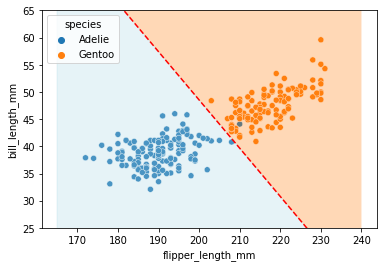

In [27]:
# code for figure
#x = np.linspace(165, 240, 100)
sns.scatterplot(data = penguins, x = 'flipper_length_mm', y = 'bill_length_mm', hue = 'species')
plt.plot(x, decision_boundary(x, beta_0, beta_1, beta_2), '--', color = 'red')
plt.ylim(25, 65)
plt.fill_between(x, decision_boundary(x, beta_0, beta_1, beta_2), alpha = 0.3, color = 'lightblue')
plt.fill_between(x, decision_boundary(x, beta_0, beta_1, beta_2), np.repeat(70, 100), alpha = 0.3)

[Back to top](#-Index)

### Problem 4

#### Comparing regressors

**10 Points**

Now, fit a second regressor using the argument `C = 0.001`. Compare the decision boundary by using what you've seen earlier. How did the decision boundary change based on this?  The slope of the new decision boundary should either be more or less than the default settings.  Assign your answer as a string -- `greater than` or `less than` to `ans4` below



In [28]:
log_reg2 = LogisticRegression(C = 0.001).fit(X_train, y_train)
beta2_0 = log_reg2.intercept_[0]
beta2_1 = log_reg2.coef_[0][0]
beta2_2 = log_reg2.coef_[0][1]

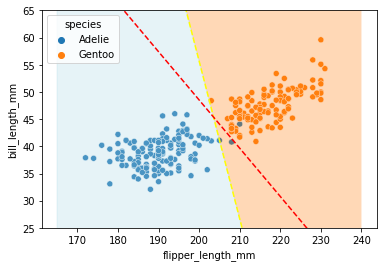

In [31]:
#plot
sns.scatterplot(data = penguins, x = 'flipper_length_mm', y = 'bill_length_mm', hue = 'species')
plt.plot(x, decision_boundary(x, beta2_0, beta2_1, beta2_2), '--', color = 'yellow')
plt.plot(x, decision_boundary(x, beta_0, beta_1, beta_2), '--', color = 'red')
plt.ylim(25, 65)
plt.fill_between(x, decision_boundary(x, beta2_0, beta2_1, beta2_2), alpha = 0.3, color = 'lightblue')
plt.fill_between(x, decision_boundary(x, beta2_0, beta2_1, beta2_2), np.repeat(70, 100), alpha = 0.3)

In [32]:
decision_boundary(x, beta_0, beta_1, beta_2)

array([79.60829113, 78.93573301, 78.26317489, 77.59061678, 76.91805866,
       76.24550055, 75.57294243, 74.90038432, 74.2278262 , 73.55526808,
       72.88270997, 72.21015185, 71.53759374, 70.86503562, 70.19247751,
       69.51991939, 68.84736127, 68.17480316, 67.50224504, 66.82968693,
       66.15712881, 65.48457069, 64.81201258, 64.13945446, 63.46689635,
       62.79433823, 62.12178012, 61.449222  , 60.77666388, 60.10410577,
       59.43154765, 58.75898954, 58.08643142, 57.41387331, 56.74131519,
       56.06875707, 55.39619896, 54.72364084, 54.05108273, 53.37852461,
       52.7059665 , 52.03340838, 51.36085026, 50.68829215, 50.01573403,
       49.34317592, 48.6706178 , 47.99805969, 47.32550157, 46.65294345,
       45.98038534, 45.30782722, 44.63526911, 43.96271099, 43.29015287,
       42.61759476, 41.94503664, 41.27247853, 40.59992041, 39.9273623 ,
       39.25480418, 38.58224606, 37.90968795, 37.23712983, 36.56457172,
       35.8920136 , 35.21945549, 34.54689737, 33.87433925, 33.20

In [33]:
decision_boundary(x, beta2_0, beta2_1, beta2_2)

array([157.26640499, 155.06793189, 152.86945879, 150.67098568,
       148.47251258, 146.27403948, 144.07556638, 141.87709328,
       139.67862018, 137.48014708, 135.28167398, 133.08320088,
       130.88472778, 128.68625468, 126.48778158, 124.28930848,
       122.09083538, 119.89236228, 117.69388918, 115.49541608,
       113.29694297, 111.09846987, 108.89999677, 106.70152367,
       104.50305057, 102.30457747, 100.10610437,  97.90763127,
        95.70915817,  93.51068507,  91.31221197,  89.11373887,
        86.91526577,  84.71679267,  82.51831957,  80.31984647,
        78.12137336,  75.92290026,  73.72442716,  71.52595406,
        69.32748096,  67.12900786,  64.93053476,  62.73206166,
        60.53358856,  58.33511546,  56.13664236,  53.93816926,
        51.73969616,  49.54122306,  47.34274996,  45.14427686,
        42.94580375,  40.74733065,  38.54885755,  36.35038445,
        34.15191135,  31.95343825,  29.75496515,  27.55649205,
        25.35801895,  23.15954585,  20.96107275,  18.76

In [34]:
### GRADED

ans4 = ''

# YOUR CODE HERE
#raise NotImplementedError()
ans4 = 'greater than'

# Answer check
print(ans4)

greater than
